# HOSPITALITY DATASET ANALYSIS


PROBLEM STATEMENT:


Atliq Grands owns multiple five-star hotels across India. They have been in the hospitality
industry for the past 20 years. Due to strategic moves from other competitors and ineffective
decision-making in management, Atliq Grands are losing its market share and revenue in the
luxury/business hotels category. As a strategic move, the managing director of Atliq Grands
wanted to incorporate “Business and Data Intelligence” in order to regain their market share
and revenue.
However, they do not have an in-house data analytics team to provide them with these
insights. Their revenue management team had decided to hire a 3rd party service provider to
provide them with insights from their historical data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bookings = pd.read_csv('/content/fact_bookings.csv')
df_date = pd.read_csv('/content/dim_date.csv')
df_hotels = pd.read_csv('/content/dim_hotels.csv')
df_rooms = pd.read_csv('/content/dim_rooms.csv')
df_agg_bookings = pd.read_csv('/content/fact_aggregated_bookings.csv')

FACT BOOKINGS DATASET

In [3]:
df_bookings.head(6)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4.0,Checked Out,9100,9100


In [4]:
df_bookings.shape

(134590, 12)

In [5]:
# Unique Values in room category
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
# Unique Values in booking platform
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
# Count the number of bookings by each unique booking platform.

df_bookings.booking_platform.value_counts()

,count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


<Axes: xlabel='booking_platform'>

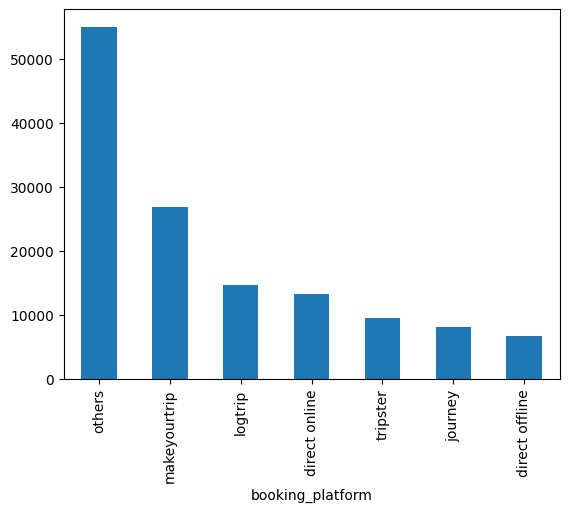

In [8]:
# Bar chart Visualization for the above data

df_bookings.booking_platform.value_counts().plot(kind='bar')

In [9]:
# Generate descriptive statistics for all columns in the df_bookings dataframe

df_bookings.describe(include='all')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
count,134590,134590.000000,134590,134590,134590,134590.000000,134590,134590,56683.000000,134590,134590.000000,134590.000000
unique,134590,NaN,116,92,97,NaN,4,7,NaN,3,NaN,NaN
top,May012216558RT11,NaN,2022-06-08,2022-07-16,2022-05-09,NaN,RT2,others,NaN,Checked Out,NaN,NaN
freq,1,NaN,1670,2017,1840,NaN,49505,55066,NaN,94411,NaN,NaN
mean,NaN,18061.113493,NaN,NaN,NaN,2.036808,NaN,NaN,3.619004,NaN,14916.013188,12696.123256
std,NaN,1093.055847,NaN,NaN,NaN,1.031766,NaN,NaN,1.235009,NaN,6452.868072,6928.108124
min,NaN,16558.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,6500.000000,2600.000000
25%,NaN,17558.000000,NaN,NaN,NaN,1.000000,NaN,NaN,3.000000,NaN,9900.000000,7600.000000
50%,NaN,17564.000000,NaN,NaN,NaN,2.000000,NaN,NaN,4.000000,NaN,13500.000000,11700.000000
75%,NaN,18563.000000,NaN,NaN,NaN,2.000000,NaN,NaN,5.000000,NaN,18000.000000,15300.000000


In [10]:
# Minimum & Maximum Revenue Generation

df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 45220)

DATE & HOTELS DATASET

In [11]:
df_date.head(6)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
5,06-May-22,May 22,W 19,weekeday


In [12]:
df_hotels.head(6)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi


In [14]:
# Count the number of hotels by category

df_hotels.category.value_counts()

,count
category,
Luxury,16
Business,9


In [15]:
# Count the number of Hotels by City and sort in descending order

df_hotels.city.value_counts().sort_values(ascending= False)

,count
city,
Mumbai,8
Hyderabad,6
Bangalore,6
Delhi,5


<Axes: xlabel='city'>

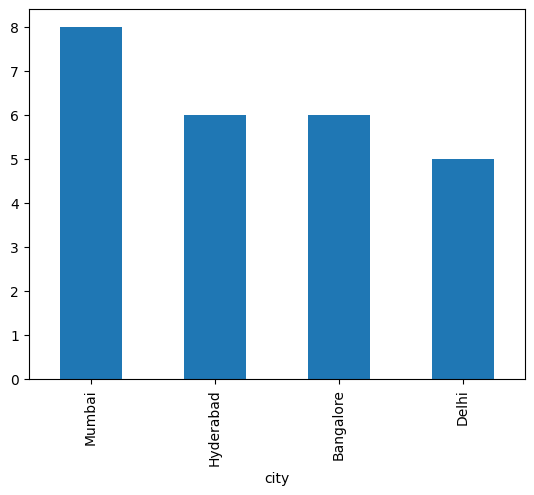

In [17]:
# Bar Chart Visualization

df_hotels.city.value_counts().sort_values(ascending= False).plot(kind = 'bar')

ROOMS & AGG BOOKINGS DATASET

In [18]:
df_rooms.head(6)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [19]:
df_agg_bookings.head(6)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
5,17560,01-May-22,RT1,28,40


In [3]:
# unique property ids

df_agg_bookings.property_id.unique()


array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [4]:
# Total bookings per property id

df_agg_bookings.property_id.value_counts()

,count
property_id,
16559,368
17559,368
17564,368
19561,368
19559,368
18563,368
18562,368
18561,368
18559,368


In [7]:
# properties that have higher capacity

df_agg_bookings.loc[:,'capacity'].max()


50

In [8]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [11]:
lower_limit = df_bookings.revenue_realized.mean()- 3*df_bookings.revenue_realized.std()
lower_limit

-8088.201116253131

In [12]:
higher_limit = df_bookings.revenue_realized.mean()+ 3*df_bookings.revenue_realized.std()
higher_limit

33480.44762788103

In [13]:
# Room category among exceptionally high revenue booking

df_bookings[df_bookings.revenue_realized> higher_limit].room_category.value_counts()

,count
room_category,
RT4,1300


In [14]:
# Check for null values in aggregated fact bookings table and rectify the values if any.

df_agg_bookings.isnull().sum()

,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,0


In [18]:
# Occupancy Percentage Column

df_agg_bookings['Occu_per'] = round((df_agg_bookings['successful_bookings']/ df_agg_bookings['capacity'])*100,2)

df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,Occu_per
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67
3,17558,01-May-22,RT1,13,19,68.42
4,16558,01-May-22,RT1,18,19,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22
9196,16559,31-Jul-22,RT4,13,18,72.22
9197,17558,31-Jul-22,RT4,3,6,50.00
9198,19563,31-Jul-22,RT4,3,6,50.00


In [19]:
# Average Occupancy rate in each room category

df_agg_bookings.groupby('room_category').Occu_per.mean()

,Occu_per
room_category,
RT1,57.919022
RT2,58.007948
RT3,58.028213
RT4,59.278722


In [20]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [21]:
# Merge Function on both tables

mer = pd.merge(df_agg_bookings, df_rooms, left_on='room_category', right_on='room_id')
mer

,property_id,check_in_date,room_category,successful_bookings,capacity,Occu_per,room_id,room_class
0,16559,01-May-22,RT1,25,30,83.33,RT1,Standard
1,19562,01-May-22,RT1,28,30,93.33,RT1,Standard
2,19563,01-May-22,RT1,23,30,76.67,RT1,Standard
3,17558,01-May-22,RT1,13,19,68.42,RT1,Standard
4,16558,01-May-22,RT1,18,19,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6,50.00,RT4,Presidential


In [22]:
# Average Occupancy by Room Class

mer.groupby('room_class').Occu_per.mean().round(2)

,Occu_per
room_class,
Elite,58.01
Premium,58.03
Presidential,59.28
Standard,57.92


In [23]:
# Drop Room id column as repeated twice

mer.drop('room_id', axis = 1 , inplace = True)
mer

,property_id,check_in_date,room_category,successful_bookings,capacity,Occu_per,room_class
0,16559,01-May-22,RT1,25,30,83.33,Standard
1,19562,01-May-22,RT1,28,30,93.33,Standard
2,19563,01-May-22,RT1,23,30,76.67,Standard
3,17558,01-May-22,RT1,13,19,68.42,Standard
4,16558,01-May-22,RT1,18,19,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22,Presidential
9196,16559,31-Jul-22,RT4,13,18,72.22,Presidential
9197,17558,31-Jul-22,RT4,3,6,50.00,Presidential
9198,19563,31-Jul-22,RT4,3,6,50.00,Presidential


In [24]:
  # Average Occupancy rate per city

  df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [25]:
merg = pd.merge(mer, df_hotels, on='property_id', how = 'outer')
merg

,property_id,check_in_date,room_category,successful_bookings,capacity,Occu_per,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-May-22,RT1,20,30,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-May-22,RT1,17,30,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,04-May-22,RT1,21,30,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,05-May-22,RT1,16,30,53.33,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9195,18560,27-Jul-22,RT4,6,15,40.00,Presidential,Atliq City,Business,Hyderabad
9196,18560,28-Jul-22,RT4,9,15,60.00,Presidential,Atliq City,Business,Hyderabad
9197,18560,29-Jul-22,RT4,8,15,53.33,Presidential,Atliq City,Business,Hyderabad
9198,18560,30-Jul-22,RT4,9,15,60.00,Presidential,Atliq City,Business,Hyderabad


In [27]:
merg.groupby('city').Occu_per.mean().round(2)

,Occu_per
city,
Bangalore,56.34
Delhi,61.52
Hyderabad,58.12
Mumbai,57.92


<Axes: xlabel='city'>

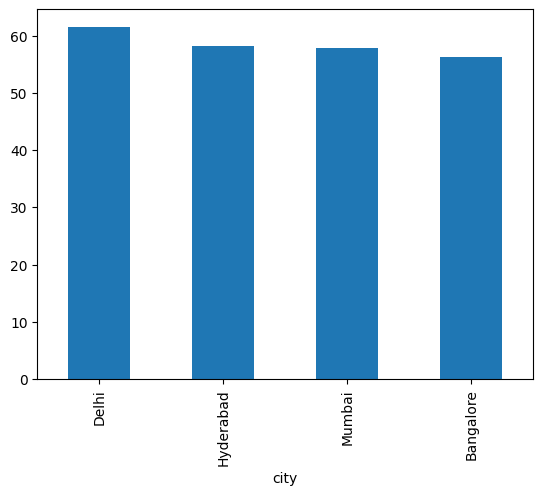

In [28]:
merg.groupby('city').Occu_per.mean().round(2).sort_values(ascending = False).plot(kind = 'bar')

In [32]:
# Check the occupancy ( weekday or weekend )

merge_df = pd.merge(merg, df_date, left_on='check_in_date', right_on='date')
merge_df

,property_id,check_in_date,room_category,successful_bookings,capacity,Occu_per,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,16559,01-May-22,RT2,35,41,85.37,Elite,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
2,16559,01-May-22,RT3,27,32,84.38,Premium,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
3,16559,01-May-22,RT4,17,18,94.44,Presidential,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
4,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,17564,31-Jul-22,RT4,10,17,58.82,Presidential,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend
9196,18560,31-Jul-22,RT1,22,30,73.33,Standard,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
9197,18560,31-Jul-22,RT2,34,40,85.00,Elite,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
9198,18560,31-Jul-22,RT3,17,24,70.83,Premium,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend


In [36]:
merge_df.groupby('day_type').Occu_per.mean().round(2)

,Occu_per
day_type,
weekeday,51.81
weekend,73.96


In [41]:
# Occupancy for differen cities for the month of June

June = merge_df.groupby(['city','mmm yy']) ['Occu_per'].mean()
June

city       mmm yy
Bangalore  Jul 22    56.066196
           Jun 22    55.846750
           May 22    57.094247
Delhi      Jul 22    61.254645
           Jun 22    61.456367
           May 22    61.851774
Hyderabad  Jul 22    57.648938
           Jun 22    57.688917
           May 22    59.014194
Mumbai     Jul 22    57.503770
           Jun 22    57.789542
           May 22    58.449657
Name: Occu_per, dtype: float64

In [42]:
June.loc[June.index.get_level_values('mmm yy')== 'Jun 22',:]

,,Occu_per
city,mmm yy,
Bangalore,Jun 22,55.846750
Delhi,Jun 22,61.456367
Hyderabad,Jun 22,57.688917
Mumbai,Jun 22,57.789542


In [43]:
# Generate revenue realised by City

df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [44]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [45]:
rev_realised = pd.merge(df_bookings, df_hotels, on='property_id')
rev_realised

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [46]:
rev_realised.groupby('city').revenue_realized.sum()

,revenue_realized
city,
Bangalore,420397050
Delhi,294500318
Hyderabad,325232870
Mumbai,668640991
